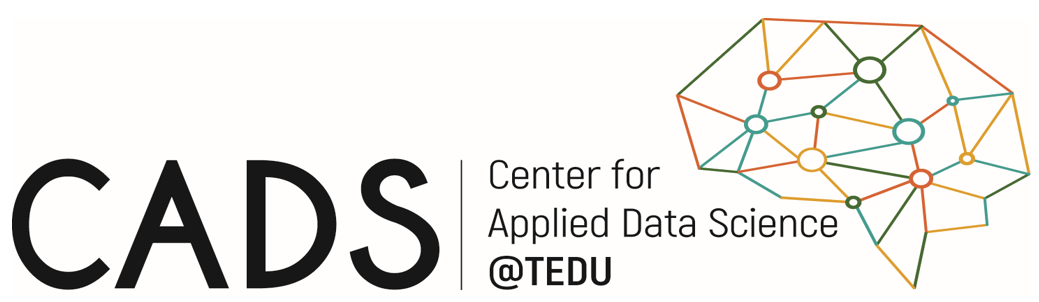

---

# Slot Machine
### Strateji
1. Sembollerin çıktısını veren bir fonksiyon yazma (semboller())
2. Gelen sembolleri skorlayan bir fonksiyon yazma (skor())
3. İki fonkisyonu birleştirip oyna() fonksiyonu yazma

### Ödül Mekanizması
Bir oyuncu aşağıdaki korallara göre kazanabilir:
- Oyuncu kolu çektiğinde 3 aynı sembol geldiğinde (0'lar hariç)
- 3 bar şekli geldiğinde (farklı bar şekilleri dahil)
- 1 veya daha fazla kiraz kiraz sembolü geldiğinde


| Sembol Kombinasyonu | Ödül |
| :--- | :--- |
| DD DD DD | 100 |
| 7 7 7 | 80 |
| BBB BBB BBB | 40 |
| BB BB BB | 25 |
| B B B | 10 |
| C C C | 10 |
| Tüm Bar Kombinasyonları | 5 |
| C C * | 5 |
| C * C | 5 |
| * C C | 5 |
| C * * | 2 |
| * C * | 2 |
| * * C | 2 |

<br>
<br>
“DD” sembolü özel bir sembol olup, ne kadar “DD” sembolü gelirse ödül o kadar 2’ye katlanır. Aynı zamanda joker gibi davranır, yani herhangi sembolün yerini alabilir. Örneğin “7 7 7” gelmesi durumunda $80 kazanılırken “7 7 DD” gelmesi durumunda (80x2=160) “7 DD DD” gelmesi durumunda ise 320 dolar kazanılır.

### Semboller() 
Kasa Her Zaman Kazanır!
Ödülü yüksek olan sembollerin gelme olasılığı düşük, ödülü düşük olan sembollerin gelme olasılığı yüksek olacak şekilde rasgele 3 sembol getiren fonksiyonu yazalım.

Python'un temel fonksiyonları arasında rasgele seçebilen bir fonksiyon yok. Bundan dolayı, ileride de sık kullanacağınız 'numpy' kütüphanesini 'import' kullanarak bu projeye dahil edelim. 'as np' kısmı, 'numpy' kelimesini yazmak yerine 'np' yazabilmemizi sağlar.

Kullanacağımız fonksiyon np.random.choice(). Altta nasıl kullanıldığına dair bir örnek var. Fonksiyonun rasgele seçtiğini görebilmek için hücreyi birkaç kez yürütebilirsiniz.

In [ ]:
import numpy as np

np.random.choice(["CADS","DSPG","Kodluyoruz","TED"], size = 2, replace = True)

Görebildiğiniz gibi, fonksiyonun getirdiği veri bildiğimiz liste türünde değil. Bunu kolayca list() fonksiyonunu kullanarak alttaki örnekteki gibi telafi edebiliriz

In [ ]:
list(np.random.choice(["CADS","DSPG","Kodluyoruz","TED"], size = 2, replace = True))

Sembollerin gelme olasalıklarını alttaki tabloyla kontrol edebilirsiniz

| Sembol | Olasılık |
| --- | --- |
| DD | 0.03 |
|7 | 0.03 |
| BBB | 0.06 |
| BB | 0.1 |
| B | 0.25 |
| C | 0.01 |
| 0 | 0.52 |

random.choice fonksiyonunun, size ve replace dışında, p adlı argümanıyla olasılık verebiliyoruz.

##### Egzersiz
Yukarıdaki olasılıklara göre "np.random.choice" fonksiyonu yardımıyla rastgele 3 sembolü çekelim.

In [ ]:
#Çözüm


In [ ]:
list(np.random.choice(["DD","7","BBB","BB","B","C","0"], size = 3, replace = True, p = [0.03, 0.03, 0.06, 0.1, 0.25, 0.01, 0.52]))

##### Egzersiz
Yukarıdaki kodu 'semboller()' isimli fonksiyona dönüştürelim.

In [ ]:
def semboller():
    out = list(np.random.choice(["DD","7","BBB","BB","B","C","0"], size = 3, replace = True, 
                          p = [0.03, 0.03, 0.06, 0.1, 0.25, 0.01, 0.52]))
    return out

semboller()

### Oyna ()

```python
def oyna():
    # adım 1: sembolleri al
    semboller = semboller ()
    
    # adım 2: sembolleri yazdır
    print(semboller)
    
    # adım 3: sembolleri skorla
    skor = score(semboller)
    
    # adım 4: skoru getir
    return skor
```

### Skorlama Stratejisi
#### 3 sembolun aynı gelme durumu:

In [ ]:
sembollerim = ["7","7","7"]

##### Egzersiz
Bu vektörden her elemanın birbirine eşit olduğunu test edelim.

In [ ]:
(sembollerim[0] == sembollerim[1]) & (sembollerim[0] == sembollerim[2])
#veya
(sembollerim[0] == sembollerim[1]) & (sembollerim[1] == sembollerim[2])

score() kodumuzun ilk kod bloğu bunu yapacak:

```python
(sembollerim = semboller[0] == semboller[1]) & (semboller[1] == semboller[2])
if (sembollerim):
    ödül = ödüller tablosuna bakıp ödül ata
```

#### Farklı Tipte Bar (B, BB, veya BBB) Gelmesi Durumu


In [ ]:
sembollerim = ["B","BB","BBB"]

bar = (sembollerim[0] == "B" or sembollerim[0] == "BB" or sembollerim[0] == "BBB") and (sembollerim[1] == "B" or sembollerim[1] == "BB" or sembollerim[1] == "BBB") and (sembollerim[2]=="B" or sembollerim[2]=="BB" or sembollerim[2]=="BBB")

# veya

bar = True
for i in [0,1,2]:
    if sembollerim[i] not in ["B","BB","BBB"]:
        bar = False
        break

Üstteki iki farklı seçenek aynı sonuca varıyor. İkinci seçenekte bilmediğiniz terimler olabilir.
- for i in [0,1,2]: [0,1,2] listesinin içindeki elemanları sırayla 'i' değişkenine attıyor.
- if sembollerim[i] not in ["B","BB","BBB"]: eğer 'sembollerim' listesinin içinde 'i' indeksli eleman "B", "BB", veya "BBB" değilse, hepsi bar olmadığının kanıdıdır, ve aramayı durdurabiliriz (break)
- 'bar' değişkeni, kodun hepsinin bar olup olmadığını bize belirtir

score() fonksiyonumuzun ikinci kod bloğu:

```python
sembollerim  = (semboller[0] == semboller[1]) & (semboller[1] == semboller[2]) 

bar = True
for i in [0,1,2]:
    if semboller[i] not in ["B","BB","BBB"]:
        bar = False
        break

if (sembollerim):
    ödül = ödüller tablosundan bakıp ata
elif (bar):
    ödül = 5
```

#### Ödül Arama Tablosu
Ödül arama tablosunu bir sözlük kullanarak elde edebiliriz:

In [ ]:
ödüller = { "DD" : 100, "7" : 80, "BBB" : 40, "BB" : 25, "B" : 10, "C" : 10, "0" : 0 }

##### Egzersiz
Ödüller tablosundan "0" sembolüne karşılık ödülü elde edelim

In [ ]:
ödüller["0"]

##### Egzersiz
Aşağıdaki sembollerim listesindeki “7” sembolünü endeksleme ile elde ettikten sonra 
ödüller arama tablomuzu kullanarak “7”’ye karşılık gelen ödülü elde edelim.

In [ ]:
sembollerim = ["7","7","7"]
ödüller[sembollerim[1]]

score() fonksiyonumuzun üçüncü kod bloğu:

```python
sembollerim  = semboller[1] == semboller[2] & semboller[1] == semboller[3] 

bar = True
for i in [0,1,2]:
    if semboller[i] not in ["B","BB","BBB"]:
        bar = False
        break

if (sembollerim):
    ödüller  = {"DD" : 100, "7" : 80, "BBB" : 40, "BB" : 25, "B" : 10, "C" : 10, "0" = 0}
    ödül = ödüller[semboller[1]]
elif (bar):
    ödül = 5
```

#### Kiraz Sayılarına Göre Ödül Atama
Tek bir kiraz için 2 dolar, 2 kiraz için 5 dolar ödül verilecek şekilde kod bloğumuzu yazalım.
Aşağıdaki sembollerim listesindeki kiraz (yani "C") sayısını bulalım. Bunu, Python'da listelerin ".count()" fonksiyonundan yardım alarak yapabiliriz.

In [ ]:
sembollerim  = ["C","DD","C"]

sembollerim.count("C")

##### Egzersiz
Kiraz sayısı 2 olduğunda 5 dolar, 1 olduğunda 2 dolar diğer durumda ise ödül alınmayacağı 
durumu veren kod bloğunu yazalım.
Not: Kiraz sayısı 2 olduğu durumda 5 dolar veren örneği yapalım.

In [ ]:
# 1. Çözüm: if else
ödül = 0
kiraz = sembollerim.count("C")
if (kiraz == 2):
    ödül = 5
elif (kiraz == 1):
    ödül = 2
else:
    ödül = 0
    
ödül

In [ ]:
# 2. Çözüm: endeksleme
kiraz = sembollerim.count("C")
[0,2,5][kiraz]

score() fonksiyonumuzun dördüncü kod bloğu:

```python
sembollerim  = (semboller[0] == semboller[1]) & (semboller[1] == semboller[2]) 

bar = True
for i in [0,1,2]:
    if semboller[i] not in ["B","BB","BBB"]:
        bar = False
        break

if (sembollerim):
    ödüller  = {"DD" : 100, "7" : 80, "BBB" : 40, "BB" : 25, "B" : 10, "C" : 10, "0" = 0}
    ödül = ödüller[semboller[1]]
elif (bar):
    ödül = 5
else:
    kiraz = semboller.count("C")
    ödül = [0,2,5][kiraz]
```

#### Elmasların Etkisi (DD)
Sembollerim listesinde aşağıdaki gibi 2 bar ("BB") ve 1 elmas (“DD”) olduğunu varsayalım. 
Bu durumda bar olduğu için 25 dolar kazanacakken elmas etkisi ile 25*2=50 dolar kazanmamız gerekiyor.

In [ ]:
sembollerim = ["BB","BB","DD"]
ödül = 25

##### Egzersiz
Toplam elmas sayısı kadar ödülü 2 katına çıkaran bloğu yazalım

In [ ]:
elmas = sembollerim.count("DD")
ödül * (2 ** elmas)

score() fonksiyonumuzun son kod bloğu

```python
sembollerim  = semboller[1] == semboller[2] & semboller[1] == semboller[3] 

bar = True
for i in [0,1,2]:
    if semboller[i] not in ["B","BB","BBB"]:
        bar = False
        break

if (sembollerim):
    ödüller  = {"DD" : 100, "7" : 80, "BBB" : 40, "BB" : 25, "B" : 10, "C" : 10, "0" = 0}
    ödül = ödüller[semboller[1]]
elif (bar):
    ödül = 5
else:
    kiraz = semboller.count("C")
    ödül = [0,2,5][kiraz]

elmas = semboller.count("DD")
ödül = ödül * (2**elmas)
```

### Score() Fonksiyonu

In [ ]:
def score(semboller):    
    sembollerim  = (semboller[0] == semboller[1]) & (semboller[0] == semboller[2])

    bar = True
    for i in [0,1,2]:
        if semboller[i] not in ["B","BB","BBB"]:
            bar = False
            break
            
    if (sembollerim):
        ödüller  = {"DD" : 100, "7" : 80, "BBB" : 40, "BB" : 25, "B" : 10, "C" : 10, "0" : 0}
        ödül = ödüller[semboller[1]]
    elif (bar):
        ödül = 5
    else:
        kiraz = semboller.count("C")
        ödül = [0,2,5][kiraz]
        
    elmas = semboller.count("DD")
    ödül = ödül * (2**elmas)
    return ödül

### Oyna () Fonksiyonu

In [ ]:
def oyna():
    sembollerim = semboller()
    print(sembollerim)
    skor = score(sembollerim)
    return skor
oyna()

score() fonksiyonuyla bir örnek deneyelim:

In [ ]:
score(["B","BB","DD"])

Bunun yukarıda çıkardığımız kurallara göre aslında 5 x 2 = 10 etmesi gerekir. Ne yazık ki, tek sorun bu değil. Aşağıda sorun çıkaran birkaç örnek daha verildi. Sonuçta, elmasların joker davranışını devreye geçirmediğimizden kaynaklanıyor.

In [ ]:
score(["7","7","DD"])
# istenen değer: 160

In [ ]:
score(["B","DD","DD"])
# istenen değer: 40

### Joker
Elmasları joker gibi kullanacaksak, takip edebileceğimiz bir kural, bir sıralama gerek. Aslında 4 tane farklı sonuç var:

1. İki elmas gelirse, bu elmaslar elmas olmayan diğer simgenin değerini alır. Örnek olarak: ["DD","B","DD"] gelirse, biz bunu ["B","B","B"] olarak davranmamız gerekir.
2. Tek elmas gelir, ve kalan iki sembol çiftse, elmas o çiftin değerini alır. Örnek olarak: ["DD","BB","BB"] gelirse, biz bunu ["BB","BB","BB"] olarak davranmamız gerekir.
3. Tek elmas gelir, ve kalan iki sembol çift değil ama birisi kirazsa ("C"), elmas kiraza dönüşür. Örnek: ["DD","B","C"] gelirse bunu ["C","B","C"] olarak davranmamız gerekir.
4. Tek elmas gelir, kalan iki sembol çift değil ve kiraz değilse, elmas iki çift arasından birine dönüşür. Örnek: ["DD","B","BB] gelirse bunu ["BB","B","BB"] veya ["B","BB","BB"] olarak davranmamız gerekir.
5. 3 veya 0 elmas varsa, gelen liste geri verilir.

Bu sıralamanın hepsini "joker" adlı bir fonksiyona koyalım. Joker fonksiyonumuz sembolleri alıp, jokerleri düzeltmiş şekilde getirecektir. 

#### 1. Çift Elmas
Kullanacağımız mantık şöyle:
- Sembollerimizde 2 tane elmas var mı?
- Varsa, sembolleri tara ve "DD" olmayan simgeyi bul
- Getireceğimiz liste, bu simgeden 3 tane içerir

In [ ]:
sembollerim = ["DD","B","DD"]

if (sembollerim.count("DD") == 2):
    for i in sembollerim:
        if (i != "DD"):
            out = [i]*3

In [ ]:
out

Bunu joker fonksiyonumuzun ilk bloğu olarak tutabiliriz. 
```python
if (sembollerim.count("DD") == 2):
    for i in sembollerim:
        if (i != "DD"):
            out = [i]*3
```

#### 2. Tek elmas ve çift
Buradaki mantığımız şöyle:
- Sembollerimizde sadece 1 tane mi elmas var?
- Varsa, "DD" yi listeden çıkar 
- Kalan iki sembol aynı mı?
- Aynıysa, getireceğimiz liste kalan sembollerden bir tane daha içerir

##### Egzersiz
Alttaki numara içeren listede, nasıl '7'nin endeksini bulabiliriz?

In [ ]:
num = [1,7,4,8,1,3,9,7]

# 1. Metod - Döngü ve if 
for i in range(0,len(num),1):
    if (num[i] == 7):
        endeks = i
endeks

In [ ]:
# 2. Metod - .index()
endeks = num.index(7)
endeks

Aradaki fark önemlidir. 1. Metod ilk 7'yi bulduktan sonra listeyi taramaya devam eder. 2. Metod ise ilk 7yi bulunca durur. İlk metod tabi daha dinamiktir, ve edenks = i satırının altına 'break' yazarak ilk 7yi bulunca durdurtabiliriz. 2. Metod statik ama yazması daha kısadır. Python'da çok sık böyle seçenekleriniz olacaktır, ama herhangi birini seçmeden önce ne getireceğini önceden bilmek veya denemek lazım.

##### Egzersiz
Alttaki listeden "DD" yi nasıl çıkarabiliriz?

In [ ]:
sembollerim = ["C","DD","A"]
sembollerim.remove("DD")
sembollerim

Peki, listede 1. endeksteki elemanı nasıl çıkarabiliriz?

In [ ]:
sembollerim = ["C","DD","A"]
sembollerim.pop(1)
sembollerim

Yeni öğrendiklerimiz ve yukarıdaki mantığı takip ederek kod bloğumuzu yazalım.

In [ ]:
sembollerim = ['DD', 'BB', 'BB']

if sembollerim.count('DD') == 1:
    sembollerim.remove('DD')
    if sembollerim[0] == sembollerim[1]:
        out = [sembollerim[0]]*3
out

İkinci kod bloğumuzu da eklersek:

```python
if (sembollerim.count("DD") == 2):
    for i in sembollerim:
        if (i != "DD"):
            out = [i]*3
            
if (sembollerim.count("DD") == 1):
    sembollerim.remove("DD")
    if (sembollerim[0] == sembollerim[1]):
        out = sembollerim[0]*3
```

#### 3. Tek elmas, tek kiraz
Takip edeceğimiz mantık:
- Sembollerimizde sadece 1 tane mi elmas var?
- Varsa, "DD" yi listeden çıkar 
- Kalan iki sembol aynı değil ve biri kiraz mı?
- Öyleyse, gelen listeye bir kiraz ekle ve getir

Bunu yapabilmek için gerekli bilgiye sahibiz, kod bloğunu yazalım:

In [ ]:
sembollerim = ['B', 'C', 'DD']

if sembollerim.count('DD') == 1:
    sembollerim.remove('DD')
    if (sembollerim[0] != sembollerim[1]) and ('C' in sembollerim):
        out = sembollerim[0:2] + ['C']
out

Üçüncü kod bloğu da ekleyelim:
```python
if (sembollerim.count("DD") == 2):
    for i in sembollerim:
        if (i != "DD"):
            out = [i]*3
            
if (sembollerim.count("DD") == 1):
    sembollerim.remove("DD")
    if (sembollerim[0] == sembollerim[1]):
        out = sembollerim[0]*3
    
    else:
        if ("C" in sembollerim):
            out = sembollerim[0:2] + ["C"]
```

#### 4. Tek elmas, kirazsız ve çift değil
Takip edeceğimiz mantık:
- Sembollerimizde sadece 1 tane mi elmas var?
- Varsa, "DD" yi listeden çıkar 
- Kalan iki sembol aynı değil ve biri kiraz mı?
- Değilse, gelen listeden bir elemanı seç, ekle ve getir

Bu mantıkla, iki farklı bar çeşidi ve elmas gelirse, onu telafi etmiş oluruz.

In [ ]:
sembollerim = ['B', 'BB', 'DD']

if sembollerim.count('DD') == 1:
    sembollerim.remove('DD')
    if (sembollerim[0] != sembollerim[1]) and ('C' not in sembollerim):
        out = sembollerim[0:2] + [sembollerim[0]]

out

Dördüncü kod bloğumuzu da ekleyelim:
```python
if (sembollerim.count("DD") == 2):
    for i in sembollerim:
        if (i != "DD"):
            out = [i]*3
            
if (sembollerim.count("DD") == 1):
    sembollerim.remove("DD")
    if (sembollerim[0] == sembollerim[1]):
        out = sembollerim[0]*3
    
    else:
        if ("C" in sembollerim):
            out = sembollerim[0:2] + ["C"]
        else:
            out = sembollerim[0:2] + [sembollerim[0]]
```

### joker() 

In [ ]:
def joker(semboller):
    sembollerim = list(semboller)
    
    if (sembollerim.count("DD") == 2):
        for i in sembollerim:
            if (i != "DD"):
                out = [i]*3
            
    elif (sembollerim.count("DD") == 1):
        sembollerim.remove("DD")
        if (sembollerim[0] == sembollerim[1]):
            out = [sembollerim[0]]*3
    
        else:
            if ("C" in sembollerim):
                out = sembollerim[0:2] + ["C"]
            else:
                out = sembollerim[0:2] + [sembollerim[0]]
    else:
        out = list(sembollerim)
    return out

joker fonksiyonumuzu score() fonksiyonumuza ekleyelim. Score fonksiyonumuzun neredeyse hepsinde jokersiz listeyi kullanmamız lazım. Sadece en sonda, DD ler ile katlama yapılınca orjinal 'semboller' listemizi kullanmamız gerek.

In [ ]:
def score(semboller):
    jokersiz = joker(semboller)
    
    sembollerim  = (jokersiz[0] == jokersiz[1]) & (jokersiz[0] == jokersiz[2])

    bar = True
    for i in [0,1,2]:
        if jokersiz[i] not in ["B","BB","BBB"]:
            bar = False
            break
            
    if (sembollerim):
        ödüller  = {"DD" : 100, "7" : 80, "BBB" : 40, "BB" : 25, "B" : 10, "C" : 10, "0" : 0}
        ödül = ödüller[jokersiz[1]]
    elif (bar):
        ödül = 5
    else:
        kiraz = jokersiz.count("C")
        ödül = [0,2,5][kiraz]
        
    elmas = semboller.count("DD")
    ödül = ödül * (2**elmas)
    return ödül

In [ ]:
#Kontrol edelim
score(['DD', 'DD', '7'])

şimdi yeniden oyna() yı deneyebiliriz.

In [ ]:
def oyna():
    sembollerim = semboller()
    print(sembollerim)
    skor = score(sembollerim)
    return skor

In [ ]:
oyna()

# Beklenen Kazanç

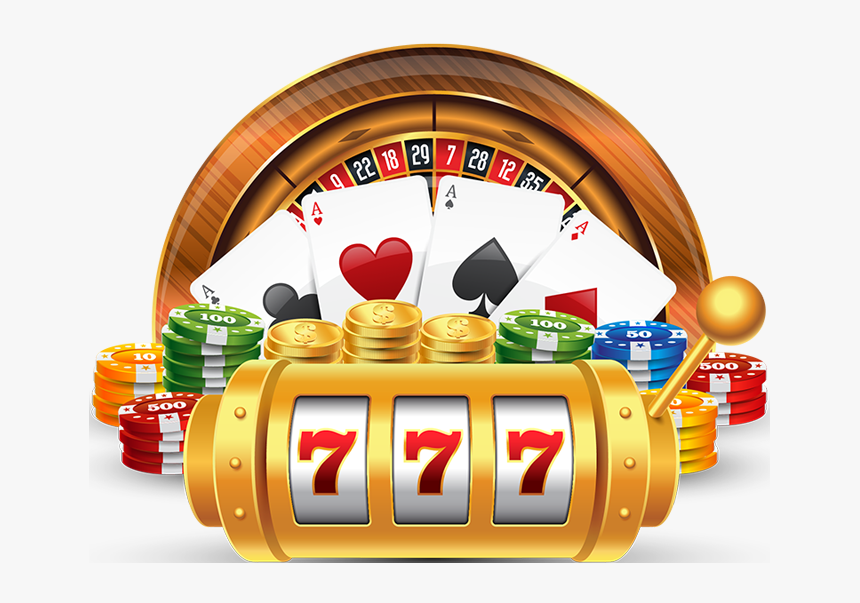

Kumarhanelerin meşhur **"kasa her zaman kazanır"** mottosu gerçek mi? İstatistiksel olarak inceleyelim. Bunun için istatistikte geçen basit **"beklenen değer"**(expected value) formülünü inceleyelim.

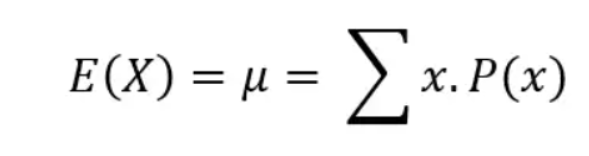

Bir olayın beklenen değeri, ilgili çıktı ve çıktının gerçekleşme olasılığının çarpılması ile hesaplanır. İlgilendiğimiz olay birden fazla olay içeriyorsa, her olayın çıktısı ve gerçekleşme olasılığının çarpımları toplamı, beklenen değere eşittir.

Bu kapsamda tüm olası üçlü kombinasyonlarımızı ve gerçekleşme olasılıklarını elde edecek döngülerimizi yazalım!

In [ ]:
#Sembollerimiz
sembollerim = ['DD', '7', 'BBB', 'BB', 'B', 'C', '0']

In [ ]:
#Tüm 3'lü kombinasyonlar
semboller = []
for i in sembollerim:
    for j in sembollerim:
        for z in sembollerim:
            semboller.append([i,j,z])

In [ ]:
#Makinede kolu çektiğimizde sembollerin gelme olasılıkları, 0 gelme olasılığı ne kadar yüksek değil mi? :)
olasılıklar = {'DD':0.03,
              '7':0.03,
              'BBB':0.06,
              'BB':0.1,
              'B':0.25,
              'C':0.01,
              '0':0.52}

In [ ]:
#Kontrol edelim
olasılıklar

In [ ]:
#İlgili kombinasyon ve sembollere karşılık gelen kombinasyonlar
[semboller[0]] + [olasılıklar[semboller[0][0]]] + [olasılıklar[semboller[0][1]]] + [olasılıklar[semboller[0][2]]]

Bu durumda 3 elmas gelme olasılığı nedir

In [ ]:
[semboller[0]] + [(olasılıklar[semboller[0][0]] * olasılıklar[semboller[0][1]] + olasılıklar[semboller[0][2]])]

Yukarıdaki kod satırlarını, döngü yardımı ile her olası 3'lü kombinasyon için düzenleyelim.

In [ ]:
olasılıklı = []
for i in range(len(semboller)):
    olasılıklı.append([semboller[i]] + [olasılıklar[semboller[i][0]]] + [olasılıklar[semboller[i][1]]] + [olasılıklar[semboller[i][2]]])

In [ ]:
olasılıklı

In [ ]:
olasılıklı = []
for i in range(len(semboller)):
    olasılıklı.append([semboller[i]] + [(olasılıklar[semboller[i][0]] * olasılıklar[semboller[i][1]] * olasılıklar[semboller[i][2]])])

In [ ]:
olasılıklı

Beklenen değer formülümüze göre, ilgili çıktı ile olasılığı çarpıp, bu değerleri toplamamız gerekiyor. Peki 3'lü kombinasyon sonucumuzu nerden elde edebiliriz? Tabi ki önceden oluşturduğumuz **score()** fonksiyonu yardımıyla elde edebiliriz. Örneğin:

In [ ]:
#Skor fonksiyonu
score(olasılıklı[0][0])

In [ ]:
olasılıklı[0][1]

In [ ]:
çarpımlar = []
for i in range(len(olasılıklı)):
    çarpımlar.append(score(olasılıklı[i][0]) * olasılıklı[i][1])

### Beklenen Değer

In [ ]:
sum(çarpımlar)